# Meteorological Service of Canada  
Increasing Fine-Scale Temperature Details from Weather Model Forecasts.

In [3]:
import numpy as np
import glob
import cv2

from PIL import Image
import matplotlib.pyplot as plt

In this folder you will find these files:

- input_training_xxxx_xxxx.npy : are the input training dataset in chronological order. It is distributed into 54 files   
- label_training_xxxx_xxxx.npy : are the label training dataset in chronological order. It is distributed into 54 files  
(from *label_training_0000_0099.npy* to *label_training_5300_5342.npy*)


- input_test_set.npy	     : are the input test set in chronological order  
- label_test_set.npy	     : are the label test set in chronological order  


- date_training.npy	     : are the date of the training dataset in chronological order  
- date_test_set.npy	     : are the date of the test set in chronological order  
- date.txt		     : is a text file that indicate de date range of each training_xxxx_xxxx.npy file  


- domain.gif		     : is an image of the area which is west of Calgary and the rockies (it is for information only)  

You can use: wget http://collaboration.cmc.ec.gc.ca/cmc/saison/concoursMindSumo/data/
to download all the files.

---

### Looking at training/label samples

In [4]:
# training - load input and label (100 samples)
input_training_0 = np.load('../data/input_training_0000_0099.npy')
label_training_0 = np.load('../data/label_training_0000_0099.npy')

# test - load input and label (248 samples)
input_test_0 = np.load('../data/input_test_set.npy')
label_test_0 = np.load('../data/label_test_set.npy')

In [5]:
print('input training 0000-0099 - shape', input_training_0.shape)
print('label training 0000-0099 - shape', label_training_0.shape)
print('number of training samples =', input_training_0.shape[0])

print('\ninput test - shape', input_test_0.shape)
print('label test - shape', label_test_0.shape)
print('number of test samples =', input_test_0.shape[0])

input training 0000-0099 - shape (100, 15, 256, 256)
label training 0000-0099 - shape (100, 1, 256, 256)
number of training samples = 100

input test - shape (248, 15, 256, 256)
label test - shape (248, 1, 256, 256)
number of test samples = 248


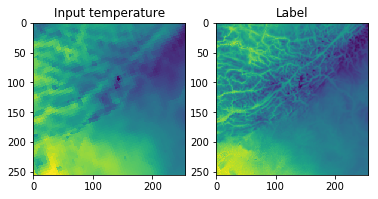

In [6]:
# sample 0
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(input_training_0[0,5,:,:])
ax1.set_title('Input temperature')

ax2.imshow(label_training_0[0,0,:,:])
ax2.set_title('Label')

plt.show()

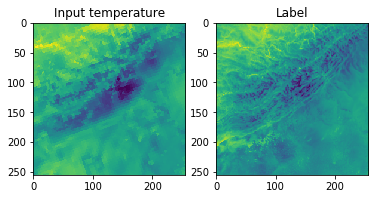

In [7]:
# sample 99
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(input_training_0[99,5,:,:])
ax1.set_title('Input temperature')

ax2.imshow(label_training_0[99,0,:,:])
ax2.set_title('Label')

plt.show()

#### first image of label training (temperature map only)

In [8]:
label_sample_0 = label_training_0[0]

In [9]:
label_image_0 = label_sample_0[0]
label_image_0.shape

(256, 256)

In [10]:
print(label_image_0)

[[ 9.934269  10.239933  10.230167  ...  4.123722   3.146183   1.7604408]
 [ 9.555363   9.337589   9.319035  ...  5.177433   4.007511   1.9870033]
 [10.261417   9.7946205  9.606144  ...  4.512394   3.8121986  2.1198158]
 ...
 [23.974308  24.227238  22.372746  ...  9.2164955  8.698917   8.552433 ]
 [22.748722  22.32294   22.906925  ...  8.931339   8.689152   8.534855 ]
 [23.82587   22.086613  22.70673   ...  8.754581   8.649113   8.534855 ]]


In [11]:
print('--- image 0 ---')
print('min temperature value = ', np.min(label_training_0[0][0]))
print('max temperature value = ', np.max(label_training_0[0][0]))
print('mean temperature value= ', np.mean(label_training_0[0][0]))

print('\n--- image 1 ---')
print('min temperature value = ', np.min(label_training_0[1][0]))
print('max temperature value = ', np.max(label_training_0[1][0]))
print('mean temperature value= ', np.mean(label_training_0[1][0]))

print('\n--- image 2 ---')
print('min temperature value = ', np.min(label_training_0[2][0]))
print('max temperature value = ', np.max(label_training_0[2][0]))
print('mean temperature value= ', np.mean(label_training_0[2][0]))

--- image 0 ---
min temperature value =  -1.8098717
max temperature value =  25.449894
mean temperature value=  10.872309

--- image 1 ---
min temperature value =  -2.9733715
max temperature value =  18.54323
mean temperature value=  7.7439756

--- image 2 ---
min temperature value =  -3.5325317
max temperature value =  19.105164
mean temperature value=  6.6361847


### Get min/max values (label and input for training data)

In [30]:
def get_min_max(map_index, map_name, filenames):
    min_label = 100000
    max_label = -100000

    for filename in filenames:
        samples = np.load(filename)
        min_label = min(min_label, np.min(samples[:,map_index,::]))
        max_label = max(max_label, np.max(samples[:,map_index,::]))

    print('------------')
    print(map_name)
    print('min value =', min_label)
    print('max value = ', max_label)
    
    return min_label, max_label

In [12]:
label_training_filenames = glob.glob('../data/label_training_*')
input_training_filenames = glob.glob('../data/input_training_*')

---

In [33]:
get_min_max(5, 'Temperature lowres', input_training_filenames)
get_min_max(0, 'Temperature hires', label_training_filenames)

------------
Temperature lowres
min value = -40.42572
max value =  38.747345
------------
Temperature hires
min value = -47.53781
max value =  41.003708


(-47.53781, 41.003708)

---

In [31]:
get_min_max(13, 'Wind X-axis', input_training_filenames)
get_min_max(14, 'Wind Y-axis', input_training_filenames)

------------
Wind X-axis
min value = -25.295317
max value =  35.85625
------------
Wind Y-axis
min value = -32.89285
max value =  24.560127


(-32.89285, 24.560127)

---

In [34]:
get_min_max(4, 'Dew Point Temperature', input_training_filenames)
get_min_max(6, 'Sea Level Pressure', input_training_filenames)
get_min_max(7, 'Total Cloud Cover', input_training_filenames)
get_min_max(8, 'Height of boundery layer', input_training_filenames)
get_min_max(9, 'Total precipitation rate', input_training_filenames)
get_min_max(10, 'Water in snow pack', input_training_filenames)
get_min_max(11, 'Grid cover by snow', input_training_filenames)
get_min_max(12, 'Albedo of snow', input_training_filenames)

------------
Dew Point Temperature
min value = -46.51616
max value =  24.291122
------------
Sea Level Pressure
min value = 980.574
max value =  1053.4686
------------
Total Cloud Cover
min value = 0.0
max value =  1.0
------------
Height of boundery layer
min value = 46.849854
max value =  4637.5566
------------
Total precipitation rate
min value = 0.0
max value =  1.5974045e-05
------------
Water in snow pack
min value = 0.0
max value =  94.5625
------------
Grid cover by snow
min value = 0.0
max value =  0.9790039
------------
Albedo of snow
min value = 0.30048764
max value =  0.8001212


(0.30048764, 0.8001212)

---

### date_training

In [9]:
date_training = np.load('../data/date_training.npy')

print('number of dates (samples) =', len(date_training))
print(date_training)
print(date_training[0].decode('UTF-8'))

number of dates (samples) = 5344
[b'2016100100' b'2016100103' b'2016100106' ... b'2018093015' b'2018093018'
 b'2018093021']
2016100100


---

### Normalize temperature image

In [35]:
'''
returns an image with values between [0, 1] <-- [min, max]
'''
def normalize_temperature_image(temperature_img, min_value, max_value):
    norm_img = (temperature_img - min_value) / (max_value - min_value)
    
    norm_img[norm_img < 0] = 0   # clip negative numbers
    norm_img[norm_img > 1] = 1   # clip numbers over 1.0
    
    return norm_img

In [36]:
norm_temperature_image_0 = normalize_temperature_image(label_image_0, -50, 50)
norm_temperature_image_0

array([[0.5993427 , 0.60239935, 0.60230166, ..., 0.54123724, 0.53146183,
        0.5176044 ],
       [0.59555364, 0.5933759 , 0.5931904 , ..., 0.5517743 , 0.5400751 ,
        0.51987004],
       [0.60261416, 0.5979462 , 0.59606147, ..., 0.54512393, 0.538122  ,
        0.52119815],
       ...,
       [0.73974305, 0.7422723 , 0.7237274 , ..., 0.59216493, 0.58698916,
        0.5855243 ],
       [0.7274872 , 0.72322935, 0.72906923, ..., 0.5893134 , 0.58689153,
        0.58534855],
       [0.73825866, 0.7208661 , 0.72706723, ..., 0.5875458 , 0.5864911 ,
        0.58534855]], dtype=float32)

In [132]:
norm_img = Image.fromarray((norm_temperature_image_0 * 255).astype(np.uint8), mode='L')

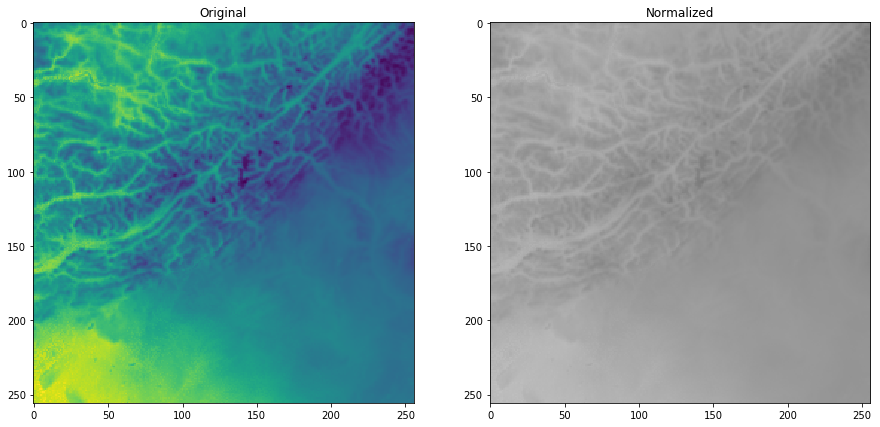

In [134]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,15))
ax1.imshow(label_image_0)
ax1.set_title('Original')
ax2.imshow(norm_img)
ax2.set_title('Normalized')
plt.show()

----

# Visualize other maps

In [16]:
def show_maps_1_4(index):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20,20))
    ax1.imshow(input_training_0[index,5,:,:])
    ax1.set_title('Temperature')
    ax2.imshow(input_training_0[index,4,:,:])
    ax2.set_title('Dew Point Temperature')
    ax3.imshow(input_training_0[index,6,:,:])
    ax3.set_title('Sea Level Pressure')
    ax4.imshow(input_training_0[index,7,:,:])
    ax4.set_title('Total Cloud Coverage')
    ax5.imshow(input_training_0[index,8,:,:])
    ax5.set_title('Height of boundery layer')
    plt.show()

In [20]:
def show_maps_5_9(index):
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(20,20))
    ax1.imshow(input_training_0[index,5,:,:])
    ax1.set_title('Temperature')
    ax2.imshow(input_training_0[index,9,:,:])
    ax2.set_title('Total Precipitation Rate')
    ax3.imshow(input_training_0[index,10,:,:])
    ax3.set_title('Water in the snow pack')
    ax4.imshow(input_training_0[index,11,:,:])
    ax4.set_title('Fraction of grid cover by snow')
    ax5.imshow(input_training_0[index,12,:,:])
    ax5.set_title('Albedo of snow')
    plt.show()

In [24]:
def show_maps_wind(index):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,10))
    ax1.imshow(input_training_0[index,5,:,:])
    ax1.set_title('Temperature')
    ax2.imshow(input_training_0[index,13,:,:])
    ax2.set_title('Wind X-axis')
    ax3.imshow(input_training_0[index,14,:,:])
    ax3.set_title('Wind Y-axis')
    plt.show()

In [28]:
def show_all_maps(index):
    show_maps_1_4(index)
    show_maps_5_9(index)
    show_maps_wind(index)    

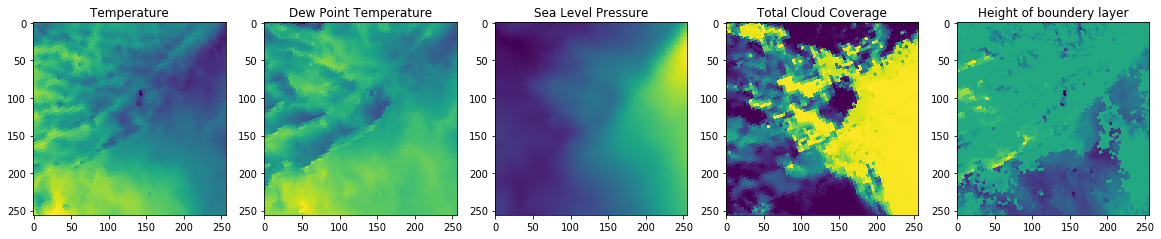

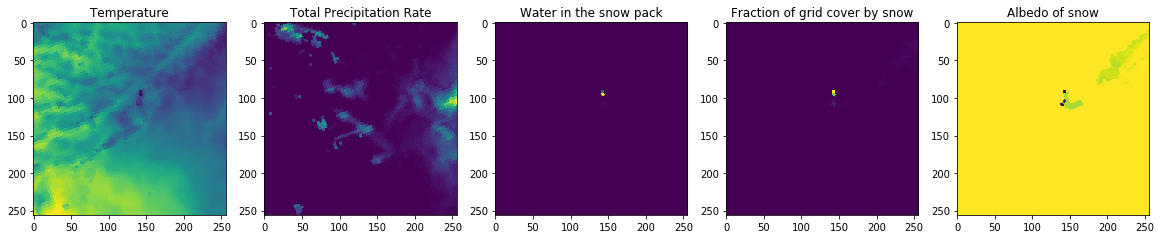

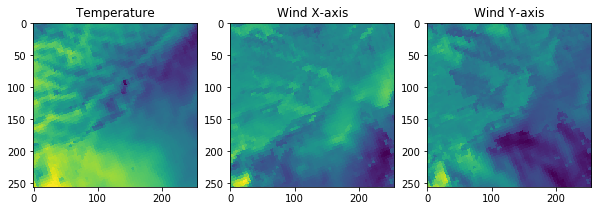

In [29]:
show_all_maps(0)

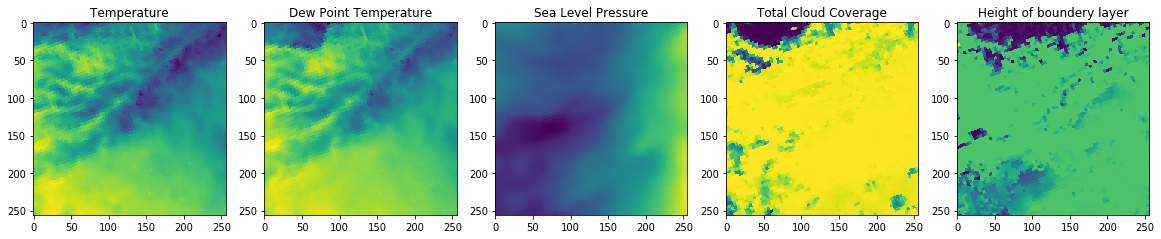

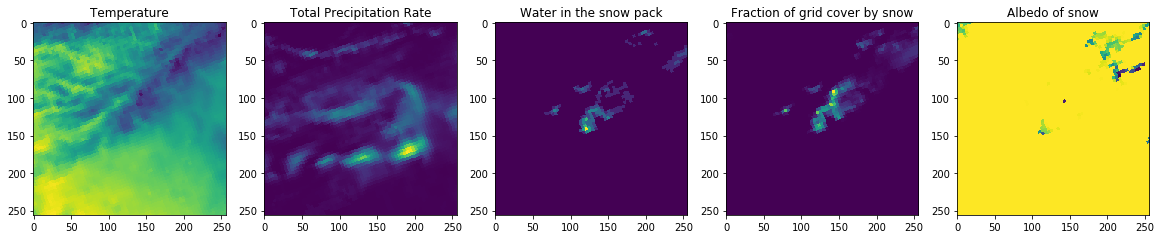

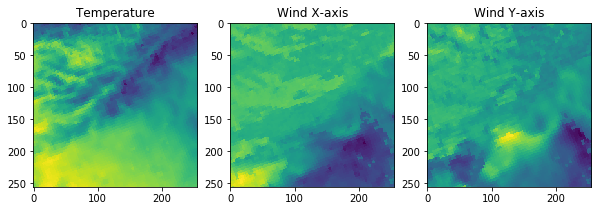

In [30]:
show_all_maps(5)